<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп». Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Описание данных

- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

Выгрузим необходимые библиотеки.

In [1]:
# !pip install phik 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import phik
from phik.report import plot_correlation_matrix

Выгрузим датасет.

In [3]:
try:
    data = pd.read_csv('C:/Users/Student/Desktop/insurance.csv')
except:
    data = pd.read_csv('/datasets/insurance.csv')

Посмотрим общую информацию о датасете.

In [4]:
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Вывод 1.1. Датасет состоит из 5 столбцов и 5000 строк. Он содержит данные о поле, возрасте, зарплате, количестве членов семьи, а также о страховых выплатах. Пропущенных значений в данном датасете нет.

Переименуем названия стоблцов в англоязычные названия.

In [6]:
data = data.rename(columns={'Пол': 'gender', 
                            'Возраст': 'age', 
                            'Зарплата': 'pay', 
                            'Члены семьи': 'family_member', 
                            'Страховые выплаты': 'insurance_payments'})

Вывод 1.2. Были изменены названия стоблцов в англоязычные названия.

Проверим типы данных столбцов.

In [7]:
data.dtypes

gender                  int64
age                   float64
pay                   float64
family_member           int64
insurance_payments      int64
dtype: object

Сменим типы данных столбцов age и pay.

In [8]:
data['age'] = data['age'].astype('int')
data['pay'] = data['pay'].astype('int')
data.dtypes

gender                int64
age                   int64
pay                   int64
family_member         int64
insurance_payments    int64
dtype: object

Вывод 1.3. Были сменены типы данных в столбцах age и pay на целочисленный.

Проанализируем данные и проверим их на выбросы и аномальные значения.

In [9]:
data.describe()

,gender,age,pay,family_member,insurance_payments
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


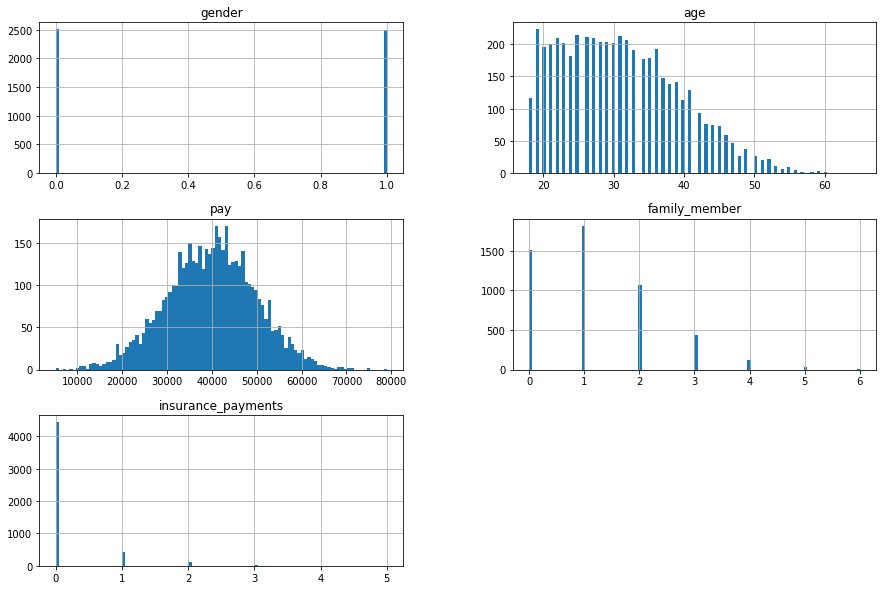

In [10]:
data.hist(bins=100, figsize=(15,10));

Вывод 1.4. 
- Мужчин и женщин примерно одинаковое количество в выборке. 
- Возраст в интервале 20-30 лет чаще всего встречается в исследуемых данных, возраст больше 50 лет встречается реже всего. 
- Зарплата распределена нормально, медиана - 40 тыс. 
- Чаще всего встречаются клиенты, у которых один член семьи или членов семьи нет, а чем больше членов семьи, тем реже такой клиент встречается. 
- Вариант, где страховых выплат клиенту не было за последний год, встречается чаще всего, а чем больше выплат было, тем реже такой клиент встречается. 
- Аномалий и выбросов найдено не было.

Построим матрицу корреляции.

interval columns not set, guessing: ['gender', 'age', 'pay', 'family_member', 'insurance_payments']


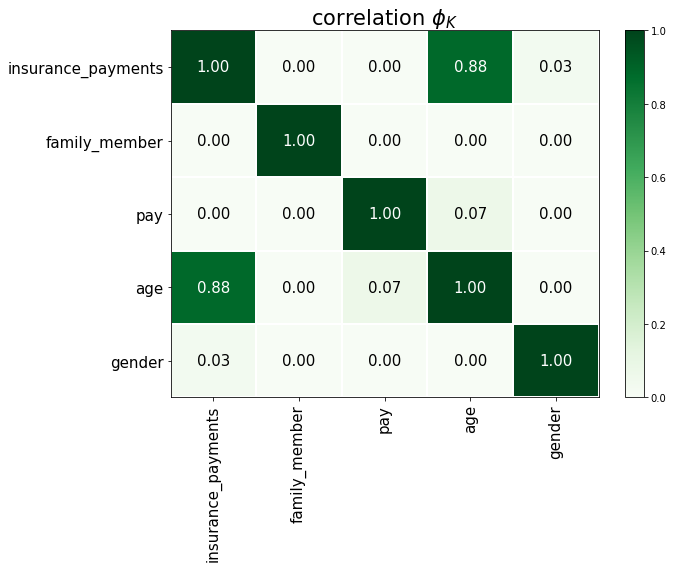

In [11]:
phic_matr = data.phik_matrix()
plot_correlation_matrix(phic_matr.values, 
                        x_labels=phic_matr.columns, 
                        y_labels=phic_matr.index, 
                        vmin=0, 
                        vmax=1, 
                        color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

Вывод 1.5. Корреляция прослеживается только между возрастом и страховыми выплатами и равна 0,88.

Проверим количество дубликатов по всему датасету и по датасету без столбца целевого признака.

In [12]:
print(data.duplicated().sum())
data.duplicated(subset=data.drop(columns=['insurance_payments']).columns).sum()

153


153

Удалим дубликаты.

In [13]:
data = data.drop_duplicates(keep='first').reset_index(drop=True)

Проверим, были ли удалены дубликаты.

In [14]:
print(data.duplicated().sum())
data.duplicated(subset=data.drop(columns=['insurance_payments']).columns).sum()

0


0

Вывод 1.6. Были найдены и удалены дубликаты по всему датасету.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$


Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? 

Не изменится. 

**Обоснование:** 

Пусть преобразованная матрица равняется

$$
X' = XA,
$$
где А - обратимая матрица

А преобразованный вектор весов равен

$$
w' = (X'^T X')^{-1} X'^T y = ((XA)^T XA)^{-1} (XA)^T y
$$


Воспользуемся для преобразования данного выражения следующим свойством транспонированной матрицы:

$$
(AB)^T = B^T A^T
$$

Получаем 

$$
w' = (A^T X^T XA)^{-1} A^T X^T y
$$

Воспользуемся для преобразования данного выражения следующим свойством обратной матрицы:

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

Получаем 

$$
w' = A^{-1} (X^T X)^{-1} (A^T)^{-1} A^T X^T y
$$

Воспользуемся определением обратной матрицы :

$$
A A^{-1} = A^{-1} A = E
$$

Получаем 

$$
w' = A^{-1} (X^T X)^{-1} E X^T y 
$$

Единичная матрица не влияет на выражение. Проводим окончательные преобразования.

Получаем 

$$
w' = A^{-1} (X^T X)^{-1} X^T y  = A^{-1} w
$$

Предсказания равняются

$$
a' = X'w' = X A A^{-1} w = X E w = X w = a
$$

Что и требовалось доказать.

## Алгоритм преобразования

**Алгоритм**

1. Определяем размерность обратимой матрицы A из матрицы признаков X, которая имеет размерность mxn --> получаем размерность nxn обратимой матрицы A.
2. Генерируем матрицу A размерностью nxn случайным образом.
3. Проверяем, что определитель матрицы A не равен нулю, в обратном случае возвращаемся к пункту 2.
4. Умножаем матрицу признаков X на обратимую матрицу A и получаем преобразованную матрицу X'.

**Обоснование**

В пункте 2 мы доказали, что умножив матрицу признаков на обратимую матрицу, качество линейной регрессии не поменятся.

1. Матрица обратима тогда и только тогда, когда она невырождена, т.е. ее определитель не равен нулю. Для этого в алгоритме проводится проверка, чтобы определитель был не равен нулю. 


2. Соотвествие размерности обратимой матрицы A и матрицы признаков X необходимо для того, чтобы их можно было перемножить и получить преобразованную матрицу X', которая должна быть такой же размерности как и матрица признаков X. 

$$
X(mxn)A(nxn) ==> X'(mxn)
$$

## Проверка алгоритма

Реализуем функцию преобразования матрицы признаков.

In [15]:
def transform_func(X):
    flag = True
    while flag:
        A = np.random.rand(X.shape[1], X.shape[1])
        if np.linalg.det(A) != 0:
            flag = False
    return X.values @ A

Разделим датасет на общие признаки и целевой признак.

In [16]:
features = data.drop(['insurance_payments'], axis = 1) 
target = data['insurance_payments']

Преобразуем признаки и выведем признаки до преобразования и после преобразования.

In [17]:
features_tranform = transform_func(features)
print(features)
print()
print(features_tranform)

      gender  age    pay  family_member
0          1   41  49600              1
1          0   46  38000              1
2          0   29  21000              0
3          0   21  41700              2
4          1   28  26100              0
...      ...  ...    ...            ...
4842       0   28  35700              2
4843       0   34  52400              1
4844       0   20  33900              2
4845       1   22  32700              3
4846       1   28  40600              1

[4847 rows x 4 columns]

[[47612.18113618  5644.1537637  27054.4260491  40326.80344711]
 [36487.20091989  4324.79574273 20739.86246138 30903.9717102 ]
 [20166.23219306  2389.91533299 11464.31272265 17080.34980616]
 ...
 [32535.90217131  3857.54231979 18484.13673799 27557.94504593]
 [31387.49330943  3722.2602452  17833.64569828 26584.46622681]
 [38969.09773576  4619.86979249 22140.6392082  33006.3252404 ]]


Масштабирование для линейной регрессии проводить не требуется. Построим модели линейной регрессии для начальных данных и преобразованных данных, проведем кроссвалидацию для 5 фолдов и исследуем метрику R2.

In [18]:
model = LinearRegression()
scores = cross_val_score(model, features, target, scoring='r2', cv=5)
print(np.mean(scores))

0.42779425809789445


In [19]:
model_tranform = LinearRegression()
scores_tranform = cross_val_score(model_tranform, features_tranform, target, scoring='r2', cv=5)
print(np.mean(scores_tranform))

0.4277942580979051


Метрика R2 одинакова для модели, обученной на начальных данных, и для модели, обученной на преобразованных данных, а значит умножение матрицы признаков на обратимую матрицу не влияет на качество линейной регрессии.